# Trading Bot

Welcome to our trading bot for Dow Jones stocks. This bot helps you to earn a lot of money.  
Just follow the instructions. 

### Before we can start, we first have to import a few libraries

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from own_jupyter_controls import dropdown_widget, generate_file_path_for_stock_data
from stock_pred import train_bot
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Selecting stock
Please select the ticker symbol of the Dow Jones stock your interested in.
First run the cell. Then select the ticker symbol from the dropdown-menu, then run the next Cell.

In [6]:
widget = dropdown_widget()
display(widget)

interactive(children=(Dropdown(description='Symbol', options=('MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO'…

In [7]:
file_path = generate_file_path_for_stock_data(widget.kwargs['x'])
print("The file path to your data is '" + file_path + "'")

The file path to your data is 'data/daily_MSFT.csv'


## Predicting stock
Next we train a neural network to learn to predict the course development of our selected stock. 

In [8]:
error, values_original, values_predicted, ohlcv_test, tech_ind_test = train_bot(file_path)

Start csv_to_dataset
    timestamp    open    high     low   close    volume
0  2019-10-31  144.90  144.93  142.99  143.37  24489475
1  2019-10-30  143.52  145.00  142.79  144.61  18471700
2  2019-10-29  144.08  144.50  142.65  142.83  20519700
3  2019-10-28  144.40  145.67  143.51  144.19  35243000
4  2019-10-25  139.34  141.14  139.20  140.73  25274600
(5033, 6)
    timestamp  change_S&P500
1  1990-10-29      -1.750660
2  1990-10-30      -0.938500
3  1990-10-31       0.722139
4  1990-11-01      -0.023024
5  1990-11-02       0.996743
Before reordering
    timestamp    open    high     low   close    volume
0  2019-10-31  144.90  144.93  142.99  143.37  24489475
1  2019-10-30  143.52  145.00  142.79  144.61  18471700
2  2019-10-29  144.08  144.50  142.65  142.83  20519700
3  2019-10-28  144.40  145.67  143.51  144.19  35243000
4  2019-10-25  139.34  141.14  139.20  140.73  25274600
(5033, 6)
After reordering
       timestamp    open    high     low   close    volume
5032  1999-11-01  9

### The error of our network

In [14]:
print("The Mean-squared error of our network on the test set is " + "{:10.3f}".format(error))

The Mean-squared error of our network on the test set is   1194.278


#### Plot of our network's performance on the test set

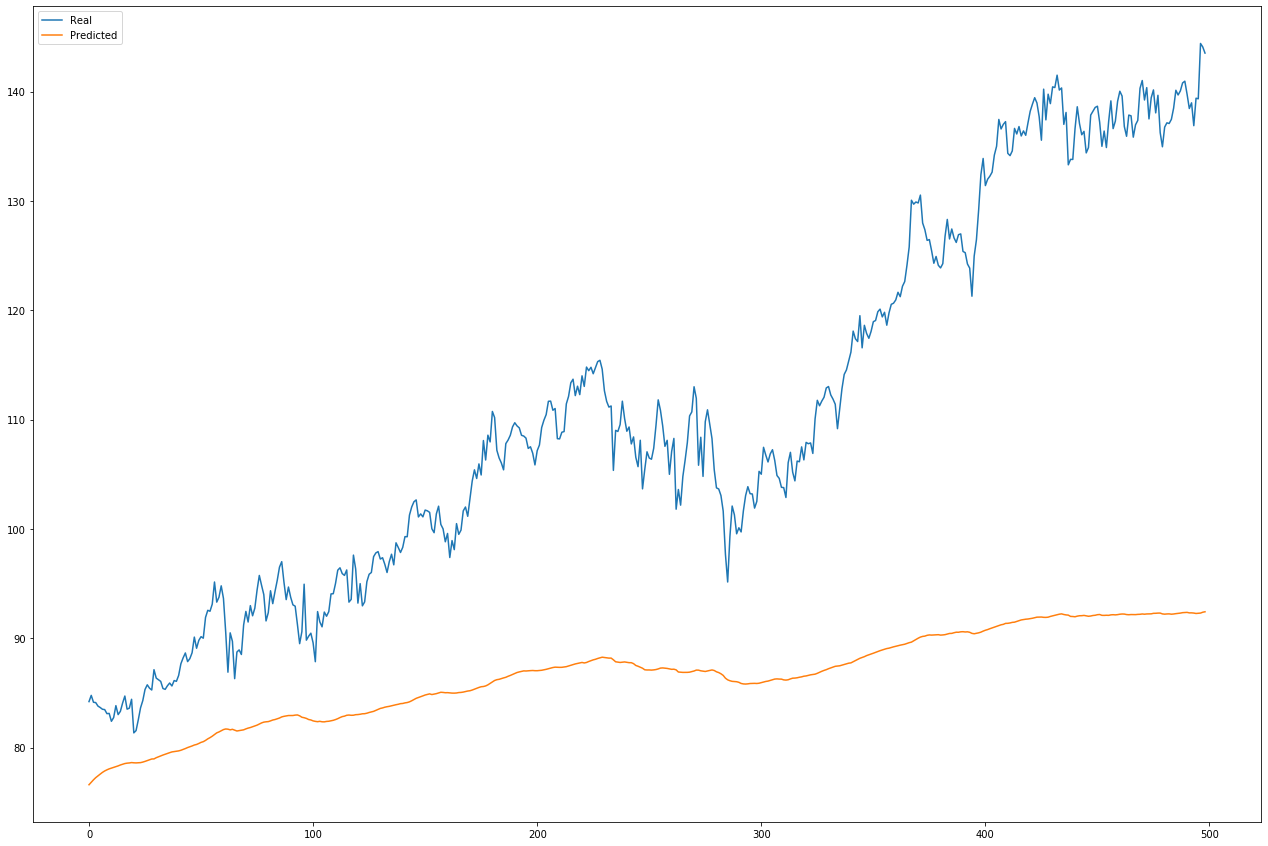

In [17]:
plt.gcf().set_size_inches(22, 15, forward=True)
real = plt.plot(values_original, label='real')
pred = plt.plot(values_predicted, label='predicted')
plt.legend(['Real', 'Predicted'])
# Delete the comment to save the plot
#save_string = str(widget.kwargs['x']) + '.png'
#plt.savefig(save_string)
plt.show()

## Trading stock
With the predictions working we can trade stock. Let's see how our bot would have performed o